In [1]:
import gzip
from PIL import Image
import numpy as np
import io
import os
import matplotlib.pyplot as plt
import cv2
def process_images(src_directory, dest_directory, new_size=(512, 512)):
    for root, dirs, files in os.walk(src_directory):
        for file in files:
            file_path = os.path.join(root, file)
            img = Image.open(file_path)
            
            output_image = img.resize(new_size, Image.LANCZOS)

            output_file_name = os.path.splitext(file)[0] + '.png'
            output_file_path = os.path.join(dest_directory, output_file_name)
            output_image.save(output_file_path, 'PNG')


src_image_paths = ['test/1st_manual']
dest_image_paths = ['test_label']

for src_directory_path, dest_directory_path in zip(src_image_paths, dest_image_paths):
    process_images(src_directory_path, dest_directory_path)


Loaded 01.png with shape: (512, 512)
Loaded 02.png with shape: (512, 512)
Loaded 03.png with shape: (512, 512)
Loaded 04.png with shape: (512, 512)
Loaded 05.png with shape: (512, 512)
Loaded 06.png with shape: (512, 512)
Loaded 07.png with shape: (512, 512)
Loaded 08.png with shape: (512, 512)
Loaded 09.png with shape: (512, 512)
Loaded 10.png with shape: (512, 512)
Loaded 11.png with shape: (512, 512)
Loaded 12.png with shape: (512, 512)
Loaded 13.png with shape: (512, 512)
Loaded 14.png with shape: (512, 512)
Loaded 15.png with shape: (512, 512)
Loaded 16.png with shape: (512, 512)
Loaded 17.png with shape: (512, 512)
Loaded 18.png with shape: (512, 512)
Loaded 19.png with shape: (512, 512)
Loaded 20.png with shape: (512, 512)
Loaded 01_manual1.png with shape: (512, 512)
Loaded 02_manual1.png with shape: (512, 512)
Loaded 03_manual1.png with shape: (512, 512)
Loaded 04_manual1.png with shape: (512, 512)
Loaded 05_manual1.png with shape: (512, 512)
Loaded 06_manual1.png with shape: (

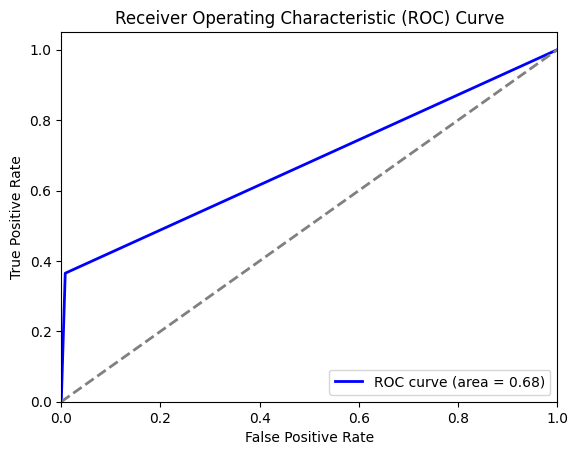

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

def calculate_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
    auc = roc_auc_score(y_true, y_pred)
    metrics = {
        'accuracy': accuracy,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'f1_score': f1_score,
        'auc': auc
    }
    return metrics

def plot_roc_curve(y_true, y_pred_prob):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    auc = roc_auc_score(y_true, y_pred_prob)
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append((filename, img))
            print(f"Loaded {filename} with shape: {img.shape}") 
    return images

# 主函数
if __name__ == "__main__":
    # 设置路径
    predicted_path = './output_512'
    ground_truth_path = './test_label'
    
    # 加载预测图像和手工标注图像
    predicted_images = load_images_from_folder(predicted_path)
    ground_truth_images = load_images_from_folder(ground_truth_path)
    
    # 确保图像数量一致
    assert len(predicted_images) == len(ground_truth_images), "预测图像和手工标注图像数量不一致"
    
    # 初始化指标汇总
    all_y_true = []
    all_y_pred = []

    # 逐图像计算指标
    for (pred_filename, pred_img), (gt_filename, gt_img) in zip(predicted_images, ground_truth_images):
        # assert pred_filename == gt_filename, f"文件名不匹配：{pred_filename} vs {gt_filename}"
        print(f"{pred_filename},{gt_filename}")
        y_true = (gt_img > 128).astype(np.uint8).flatten()
        y_pred = (pred_img > 128).astype(np.uint8).flatten()
        
        all_y_true.extend(y_true)
        all_y_pred.extend(y_pred)
    
    # 转换为numpy数组
    all_y_true = np.array(all_y_true)
    all_y_pred = np.array(all_y_pred)
    
    # 计算并输出指标
    metrics = calculate_metrics(all_y_true, all_y_pred)
    for key, value in metrics.items():
        print(f"{key}: {value:.2f}")
    
    # 绘制ROC曲线
    plot_roc_curve(all_y_true, all_y_pred)


In [3]:
predicted_images[1]

('02.png',
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))

In [4]:
filename, img = ground_truth_images[1]
# 将图像数组写入文本文件
with open('predicted_image_1.txt', 'w') as f:
    f.write(f"Filename: {filename}\n")
    f.write(f"Shape: {img.shape}\n")

np.savetxt('predicted_image_1.txt', img, fmt='%d', delimiter=' ', header=f"Filename: {filename}\nShape: {img.shape}\n")

print(f"Image {filename} saved to predicted_image_1.txt")

Image 02_manual1.png saved to predicted_image_1.txt
